In [48]:
import pandas as pd
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [49]:
# Read latest data:= h1b_dataexporthub.csv
h1_data =pd.read_csv(filepath_or_buffer = 'h1b_datahubexport.csv', dtype = {'Continuing Denials': object, 'Initial Denials':object}, sep=',' , header='infer',  na_values='NA', keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=True, infer_datetime_format=True,  chunksize=None, compression='infer')

In [50]:
h1_data

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP
0,2009,SAGINAW VLY ST UNIV,1,0,0,0,61,NaN,NaN,UNIVERSITY CENTER,NaN
1,2009,REGIONAL MED CTR BOARD,0,0,1,0,62,NaN,AL,ANNISTON,36202.0
2,2009,BIBB MED CTR BIBB COUNTY HEALTH CA,1,0,0,0,62,NaN,AL,CENTREVILLE,35042.0
3,2009,EMERGENCY MEDICAL SERVICES GROUP,0,0,1,0,62,NaN,AR,FORT SMITH,72917.0
4,2009,THE NEW FOUNDATION,0,1,0,0,61,NaN,AZ,SCOTTSDALE,85271.0
5,2009,FLOW TECH INC A ROPER INDUSTRIES I,0,0,1,0,33,NaN,AZ,TEMPE,85284.0
6,2009,NAVSTAR TECHNOLOGY INC,0,1,0,0,72,NaN,CA,ANAHEIM,92805.0
7,2009,ATASCADERO ST HOSPITAL,0,1,1,0,62,NaN,CA,ATASCADERO,93423.0
8,2009,HIGHLAND SPRINGS CONFERENCE & TRAI,0,0,1,0,61,NaN,CA,BEAUMONT,92223.0
9,2009,ROHIT BOB DOSHI,0,0,1,0,53,NaN,CA,BREA,92821.0


In [59]:
# filtering out missing data
cleaned = h1_data.dropna(how ='all')
cleaned.fillna(-999,inplace=True)


In [68]:
# Casting
cleaned[['Initial Approvals', 'Initial Denials', 'Continuing Approvals', 'Continuing Denials']] =cleaned[['Initial Approvals', 'Initial Denials', 'Continuing Approvals', 'Continuing Denials']].apply(pd.to_numeric,errors = 'coerce')

In [108]:
# Prelim stats
cleaned.describe()

# further cleaning
cleaned = cleaned[~cleaned.duplicated()] # After removing 439 duplicated entries
cleaned = cleaned[~(cleaned['Employer'] ==-999)] # removing missing companies data


,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP


In [196]:
pvt_initial_app = cleaned.pivot_table(values = 'Initial Approvals', index=['Employer','Fiscal Year'], aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All')

In [225]:
# All companies as indexes for the h1 data
x = cleaned.groupby(['Employer', 'Fiscal Year'])['Initial Approvals'].aggregate('mean').unstack().index.values 

In [241]:
# All Upper index
x_new = [a.replace('"', '') for a in x]
x_new = [a.upper() for a in x_new]

In [255]:
x_new

[' UNIV OF MASSACHUSETTS DARTMOUTH',
 'I HAVE A DREAM FOUNDATION',
 'K LINE AMERICA INC',
 'K LINE LOGISTICS USA INC',
 'LA COMUNIDAD CORP',
 'LA COMUNIDAD CORPORATION',
 '& TV COMMUNICATIONS INC',
 '&TV COMMUNICATIONS INC',
 '(GRAY MIDDLE SCH) LAKE COUNTY SCH',
 '*OPRYLAND HOTEL - FL LTD PARTNERSH',
 '0-1-5 WORLDWIDE INC',
 '004 TECHNOLOGIES USA INC',
 '01 COMMUNIQUE LABORATORY INC',
 '012 GLOBAL INC',
 '01INTERACTIVE INC',
 '02 TECHNOLOGIES INC',
 '021C COMMUNICATION CONCEPTS INC',
 '03091776 GEORGIA LLC DBA UTILIPRO',
 '09 SOLUTIONS INC',
 '0956588 BC LTD DBA PROCOGIA',
 '0CHAIN LLC',
 '0NQUEST INC',
 '1 2 3 ACUPUNCTURE CLINIC PROFESSIO',
 '1 800 CONTACTS INC',
 '1 800 FLOWERS COM INC',
 '1 800 FLOWERS.COM INC',
 '1 800 GIFT CERTIFICATES LLC DBA',
 '1 800 LIFEINSURANCE AGENCY INC',
 '1 ALLIANCE GROUP LLC',
 '1 AMERICAN FLOORING LLC',
 '1 CELLULAR STOP INC DBA 1 CELLULAR',
 '1 CHOICE CONSULTING & FINANCIAL SE',
 '1 COMMS MGT CO D/B/A EARTHLINK',
 '1 CONTINENTAL MORTGAGE STARRR INC',


In [250]:
# find any pattern
sub = 'MORGAN'
morgan_list=[]
for s in filter (lambda x: sub in x, x_new): morgan_list.append(s)

sub2 = 'BANK'
bank_list = []
for s in filter (lambda x: sub2 in x, x_new): bank_list.append(s)

In [251]:
morgan_list, bank_list

(['AMERICAN MORGAN CORPORATION',
  'BARBARA R MORGAN ELEMENTARY SCHOOL',
  'BRIDGET MORGAN LLC',
  'DONNA MORGAN LLC',
  'DREXEL MORGAN CAPITAL ADVISERS',
  'HH HEALTH SYS-MORGAN LLC DBA DECAT',
  'HH HEALTH SYSTEM - MORGAN LLC',
  'HH HEALTH SYSTEM MORGAN LLC',
  'HH HEALTH SYSTEM-MORGAN LLC',
  'HH HEALTH SYSTEM-MORGAN LLC DBA DE',
  'HILL MORGAN & ASSOCIATES LLP',
  'HUSELTON MORGAN & MAULTSBY PC',
  'JAY P MORGAN PHOTOGRAPHY DESIGN',
  'JC MORGAN INC',
  'JPMORGAN CHASE & CO',
  'JPMORGAN CHASE AND CO',
  'JPMORGAN CHASE CO',
  'KINDER MORGAN INC',
  'KNIGHT INC (A/K/A KINDER MORGAN',
  'LATTIMORE BLACK MORGAN & CAIN PC &',
  'MICHAEL H MORGAN DDS MS INC',
  'MMFA LLC DBA MELISSA MORGAN FINE A',
  'MORGAN & MORGAN PA',
  'MORGAN ADHESIVES CO LLC DBA MATAC',
  'MORGAN ADVANCED CERAMICS INC',
  'MORGAN ADVERTISING INC',
  'MORGAN BIRGE & ASOCIATES INC',
  'MORGAN CLARKE ENTERPRISES',
  'MORGAN CLARKE ENTERPRISES INC',
  'MORGAN COMMUNITY COLLEGE',
  'MORGAN CONSTRUCTION COMPANY',
  '

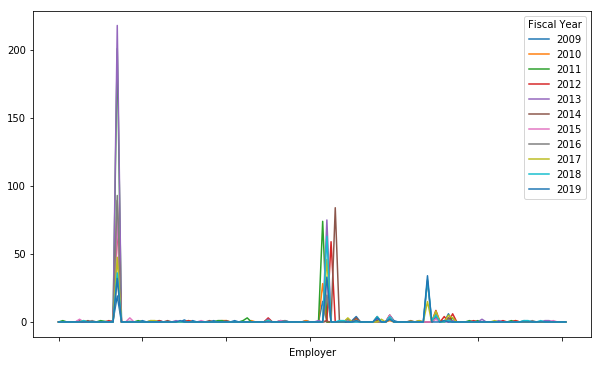

In [281]:
cleaned.groupby(['Employer', 'Fiscal Year'])['Initial Approvals'].aggregate('mean').unstack().loc[morgan_list].fillna(0).plot()

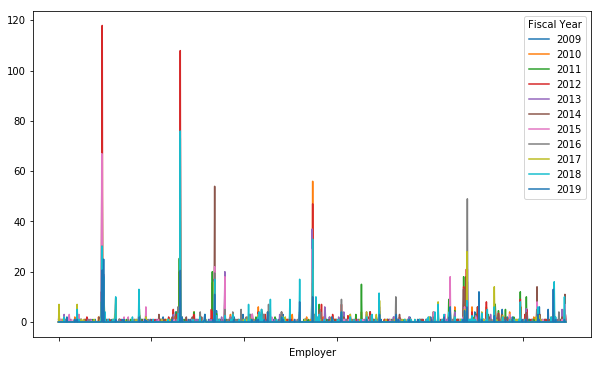

In [254]:
cleaned.groupby(['Employer', 'Fiscal Year'])['Initial Approvals'].aggregate('mean').unstack().loc[bank_list].fillna(0).plot()

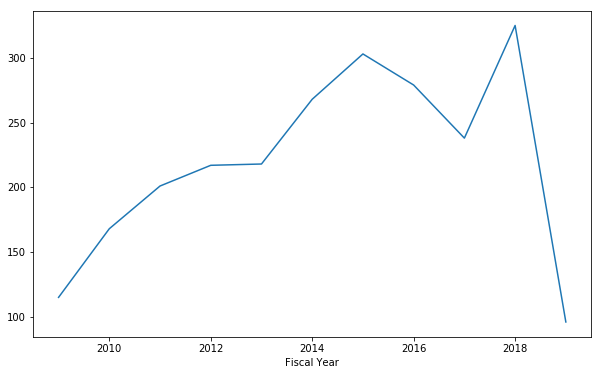

In [264]:
cleaned.groupby(['Employer', 'Fiscal Year'])['Initial Approvals'].aggregate('sum').unstack().loc['JPMORGAN CHASE & CO'].fillna(0).plot()

In [287]:
# MAX Trend
na_filled_agg_unstackdata = cleaned.groupby(['Employer', 'Fiscal Year'])['Initial Approvals'].aggregate('mean').unstack().fillna(0).max()

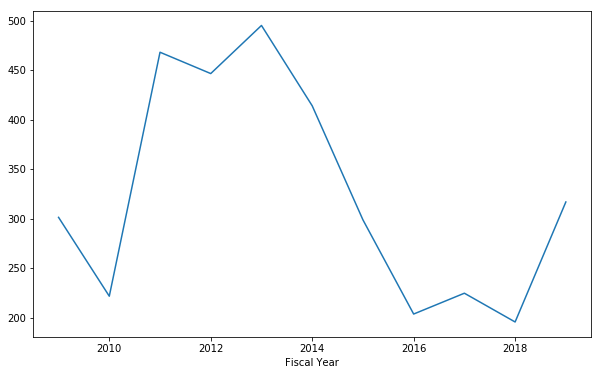

In [289]:
na_filled_agg_unstackdata

In [302]:
years = np.arange(2009,2019)

arg_max = []

for y in years:
    arg_max.append(cleaned.groupby(['Employer', 'Fiscal Year'])['Initial Approvals'].aggregate('mean').unstack().fillna(0)[y].argmax())

C:\Users\Prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


In [303]:
arg_max

['LARSEN & TOUBRO INFOTECH LIMITED',
 'YAHOO! INC',
 'LARSEN & TOUBRO INFOTECH LIMITED',
 'IBM INDIA PVT LTD',
 'SYNTEL CONSULTING INC',
 'DELOITTE CONSULTING LLP',
 'L&T TECHNOLOGY SERVICES LIMITED',
 'UNIVERSITY OF MICHIGAN',
 'DELOITT& TOUCHE LLP',
 'GOLDMAN SACHS & CO']

In [304]:
arg_max.append('JPMORGAN CHASE & CO')

['LARSEN & TOUBRO INFOTECH LIMITED',
 'YAHOO! INC',
 'LARSEN & TOUBRO INFOTECH LIMITED',
 'IBM INDIA PVT LTD',
 'SYNTEL CONSULTING INC',
 'DELOITTE CONSULTING LLP',
 'L&T TECHNOLOGY SERVICES LIMITED',
 'UNIVERSITY OF MICHIGAN',
 'DELOITT& TOUCHE LLP',
 'GOLDMAN SACHS & CO',
 'JPMORGAN CHASE & CO']

In [308]:
cleaned.groupby(['Employer', 'Fiscal Year'])['Initial Approvals'].aggregate('mean').unstack().loc[arg_max].fillna(0).transpose()

Employer,LARSEN & TOUBRO INFOTECH LIMITED,YAHOO! INC,LARSEN & TOUBRO INFOTECH LIMITED,IBM INDIA PVT LTD,SYNTEL CONSULTING INC,DELOITTE CONSULTING LLP,L&T TECHNOLOGY SERVICES LIMITED,UNIVERSITY OF MICHIGAN,DELOITT& TOUCHE LLP,GOLDMAN SACHS & CO,JPMORGAN CHASE & CO
Fiscal Year,,,,,,,,,,,
2009,301.500000,0.0,301.500000,129.0,43.000000,67.800000,0.0,190.000000,0.0,119.000000,19.166667
2010,136.500000,222.0,136.500000,0.0,131.000000,102.666667,0.0,0.000000,0.0,53.400000,33.600000
2011,468.000000,181.0,468.000000,8.2,187.000000,100.800000,0.0,56.333333,0.0,218.000000,201.000000
2012,7.000000,165.0,7.000000,446.5,1.000000,0.400000,0.0,77.500000,0.0,44.750000,72.333333
2013,1.000000,109.0,1.000000,0.0,495.000000,155.833333,0.0,0.000000,0.0,95.500000,218.000000
2014,153.166667,0.0,153.166667,0.0,0.500000,414.000000,1.0,0.333333,0.0,43.000000,89.333333
2015,111.400000,2.0,111.400000,0.0,1.166667,44.933333,299.0,101.500000,0.0,112.000000,75.750000
2016,173.333333,0.0,173.333333,0.0,112.600000,44.846154,1.0,204.000000,0.0,83.333333,93.000000
2017,30.142857,0.0,30.142857,0.0,103.000000,36.000000,0.0,0.000000,225.0,73.000000,47.600000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209D6EB2908>,
      dtype=object)

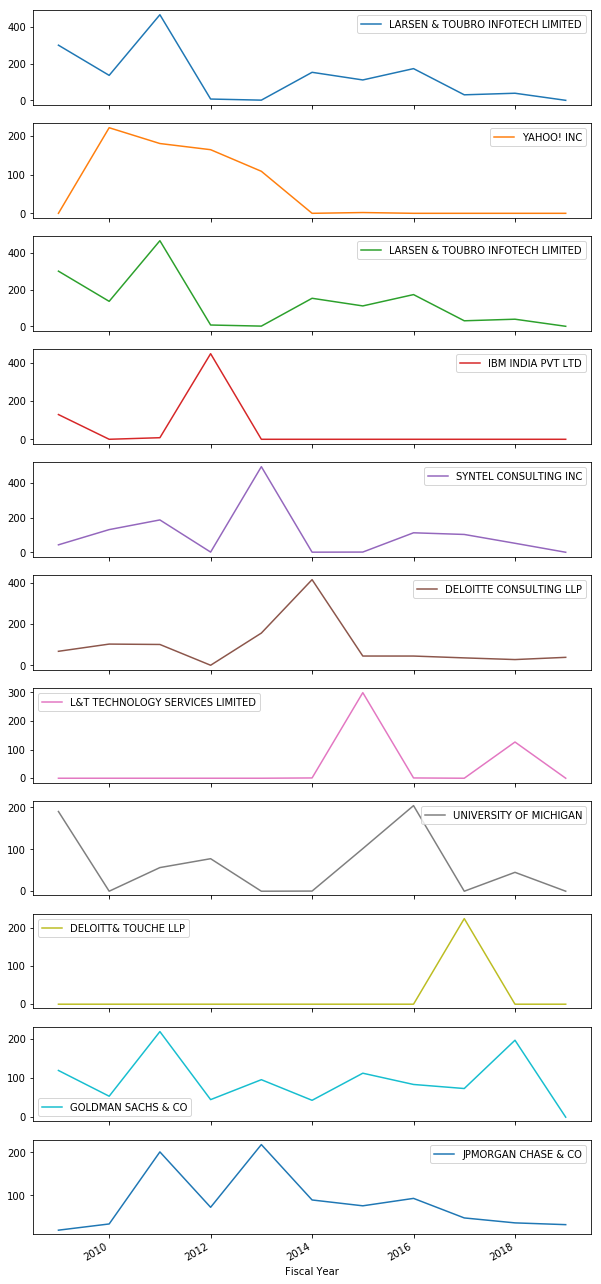

In [319]:
cleaned.groupby(['Employer', 'Fiscal Year'])['Initial Approvals'].aggregate('mean').unstack().loc[arg_max].fillna(0).transpose().plot(figsize = (10,25), subplots = True)

In [315]:
years = np.arange(2009,2019)

arg_max_sum = []

for y in years:
    arg_max_sum.append(cleaned.groupby(['Employer', 'Fiscal Year'])['Initial Approvals'].aggregate('sum').unstack().fillna(0)[y].argmax())

C:\Users\Prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


In [317]:
arg_max_sum
arg_max_sum.append('JPMORGAN CHASE & CO')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209D61B7CF8>,
      dtype=object)

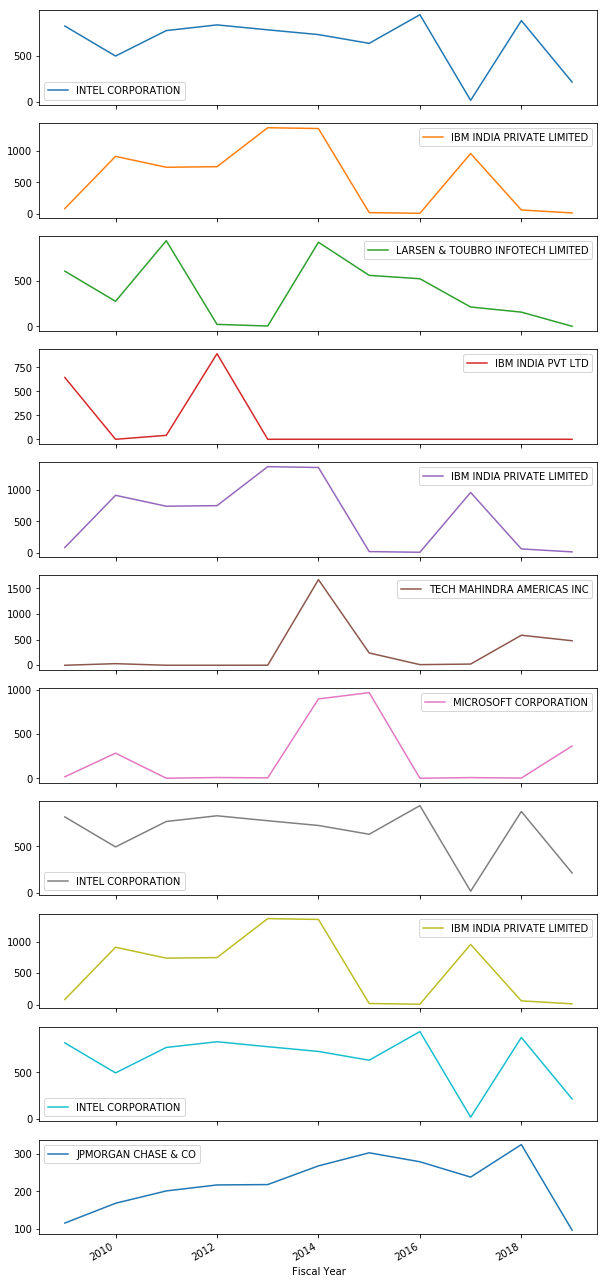

In [318]:
cleaned.groupby(['Employer', 'Fiscal Year'])['Initial Approvals'].aggregate('sum').unstack().loc[arg_max_sum].fillna(0).transpose().plot(figsize = (10,25), subplots = True)